In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [3]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [4]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product C,Anti-Ulcer,January,2019,496334,1002744,1578266,1
2019-02-01,Product C,Anti-Ulcer,February,2019,306455,619142,974480,2
2019-03-01,Product C,Anti-Ulcer,March,2019,476270,962208,1514466,3
2019-04-01,Product C,Anti-Ulcer,April,2019,628463,1269687,1998416,4
2019-05-01,Product C,Anti-Ulcer,May,2019,366750,740950,1166209,5
2019-06-01,Product C,Anti-Ulcer,June,2019,352324,711811,1120336,6
2019-07-01,Product C,Anti-Ulcer,July,2019,657300,1327952,2090113,7
2019-08-01,Product C,Anti-Ulcer,August,2019,429552,867822,1365910,8
2019-09-01,Product C,Anti-Ulcer,September,2019,499906,1009971,1589625,9


In [5]:
sales_c= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [6]:
sales_c.shape

(60, 3)

In [7]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [8]:
print('Total Sales:', sales_c['Sales'].sum())
print('Total Market Size:',sales_c['Market Size'].sum())
print('Total Marketing Expense:', sales_c['Marketing Expense'].sum())

Total Sales: 45599092
Total Market Size: 75798227
Total Marketing Expense: 33224968


Text(0.5, 1.0, 'Product C')

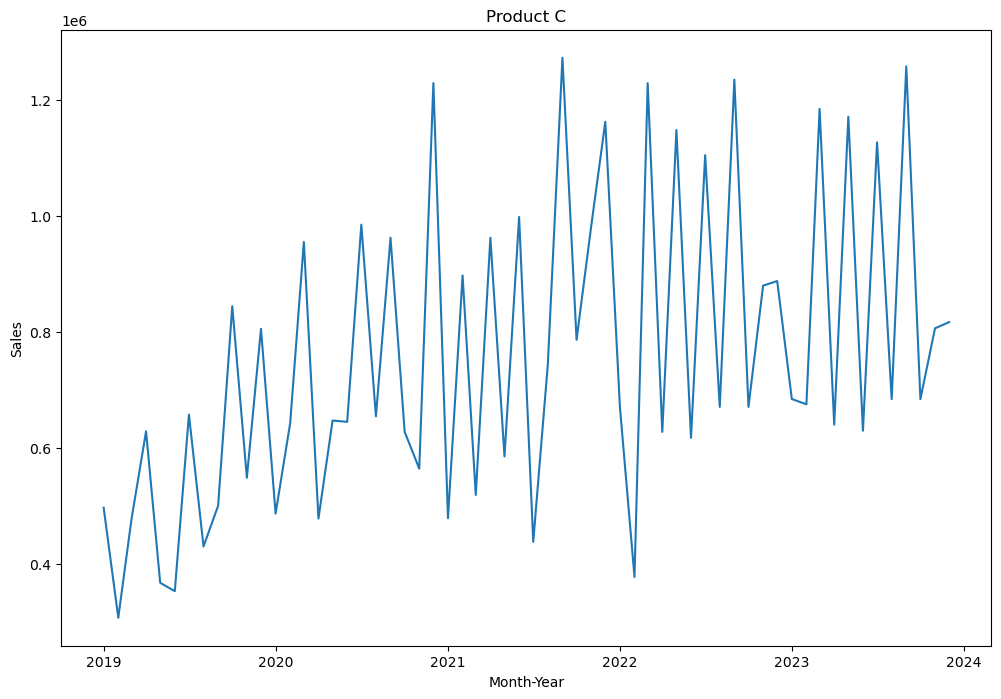

In [9]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c['Sales'])
plt.title('Product C')

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adf_test(sales_c['Sales'])

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


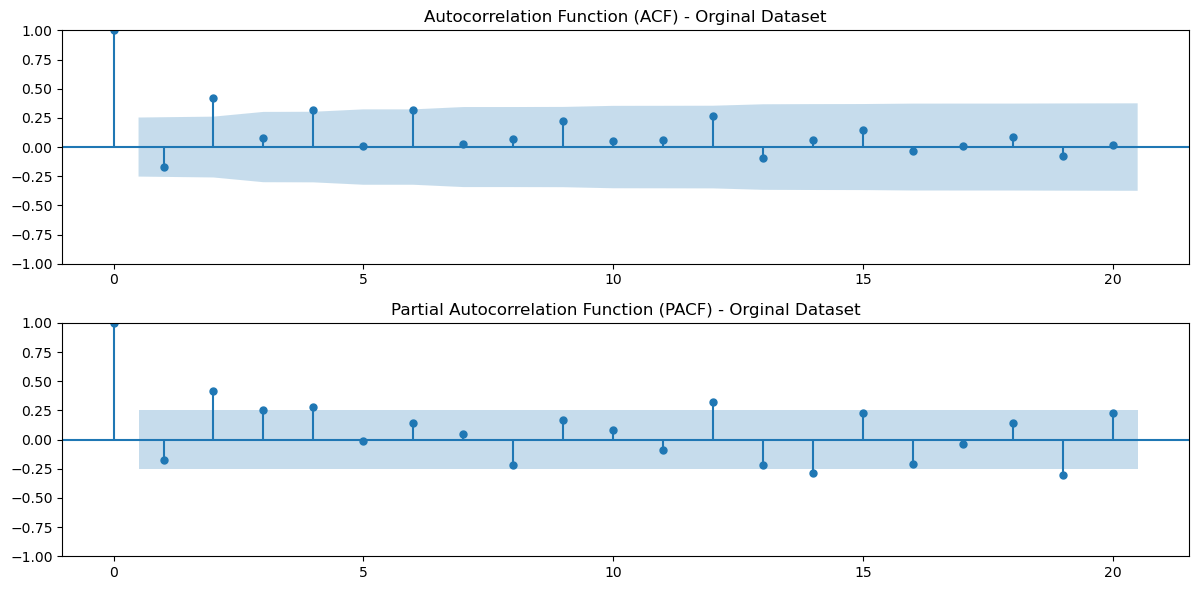

In [13]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [14]:
train= sales_c[:57]
test=sales_c[57:]

In [15]:
print(len(train), len(test))

57 3


In [16]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [17]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [18]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [19]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_c)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [20]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
1   0  1  1500.328851  1510.544107  115109.426536  1.881282e+10  137159.845965
2   0  2  1501.919684  1514.177992  106899.529029  1.616062e+10  127124.419066
4   1  1  1501.938482  1514.196790  110415.407568  1.731106e+10  131571.512531
6   2  0  1502.273287  1514.531594   97573.110629  1.362062e+10  116707.428959
7   2  1  1502.804872  1517.106231  106425.454270  1.630056e+10  127673.633982
9   3  0  1502.870205  1517.171564  104294.640627  1.515216e+10  123094.127942
5   1  2  1503.119151  1517.420510   98342.800473  1.302106e+10  114109.866725
8   2  2  1504.490300  1520.834710   98252.858836  1.310520e+10  114477.942782
12  4  0  1504.646477  1520.990887  106021.199431  1.619303e+10  127251.840260
10  3  1  1504.736234  1521.080644  106423.761364  1.608873e+10  126841.338559
15  5  0  1506.692601  1525.080062  106413.108833  1.629369e+10  127646.722493
13  4  1  1506.694774  1525.082235  106183.943747  1

In [21]:
m_arima= ARIMA(train['Sales'], order=(0,0,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -745.164
Date:                Thu, 09 May 2024   AIC                           1500.329
Time:                        16:19:19   BIC                           1510.544
Sample:                    01-01-2019   HQIC                          1504.299
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.685e+05   4.85e+04      3.475      0.001    7.34e+04    2.63e+05
Market Size           0.5212      0.035     14.898      0.000       0.453       0.590
Marketing Expense    -0.

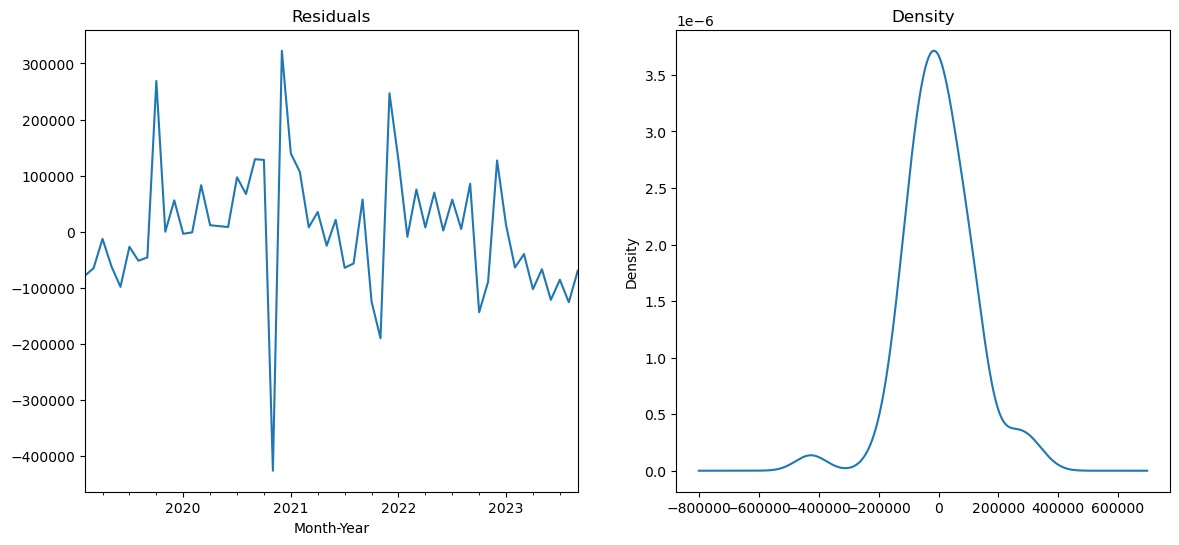

In [22]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

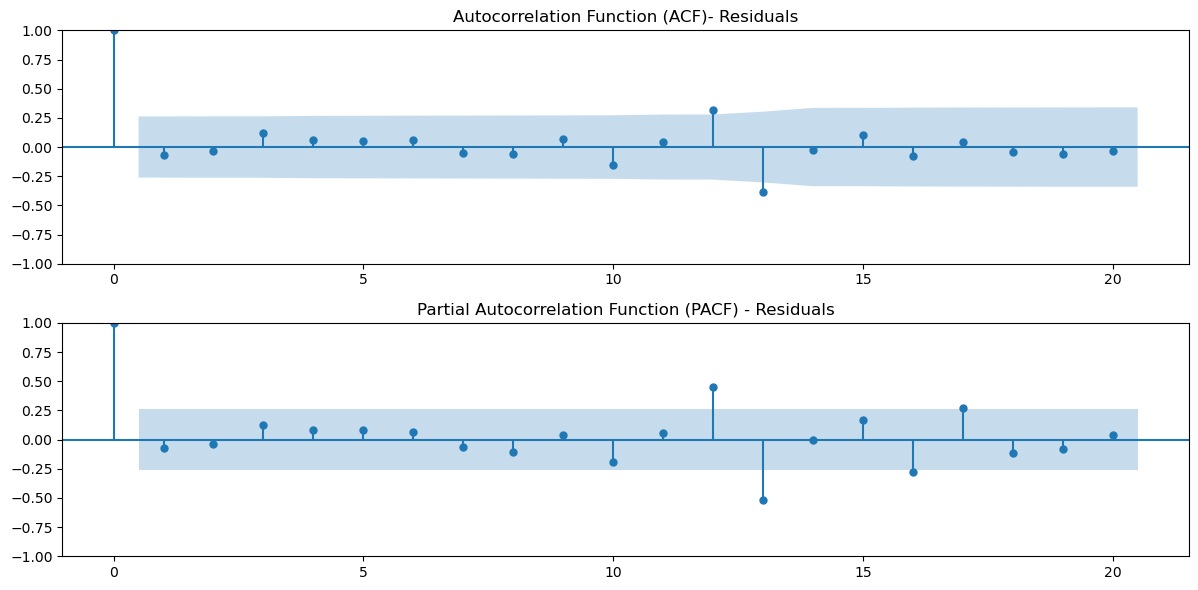

In [23]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

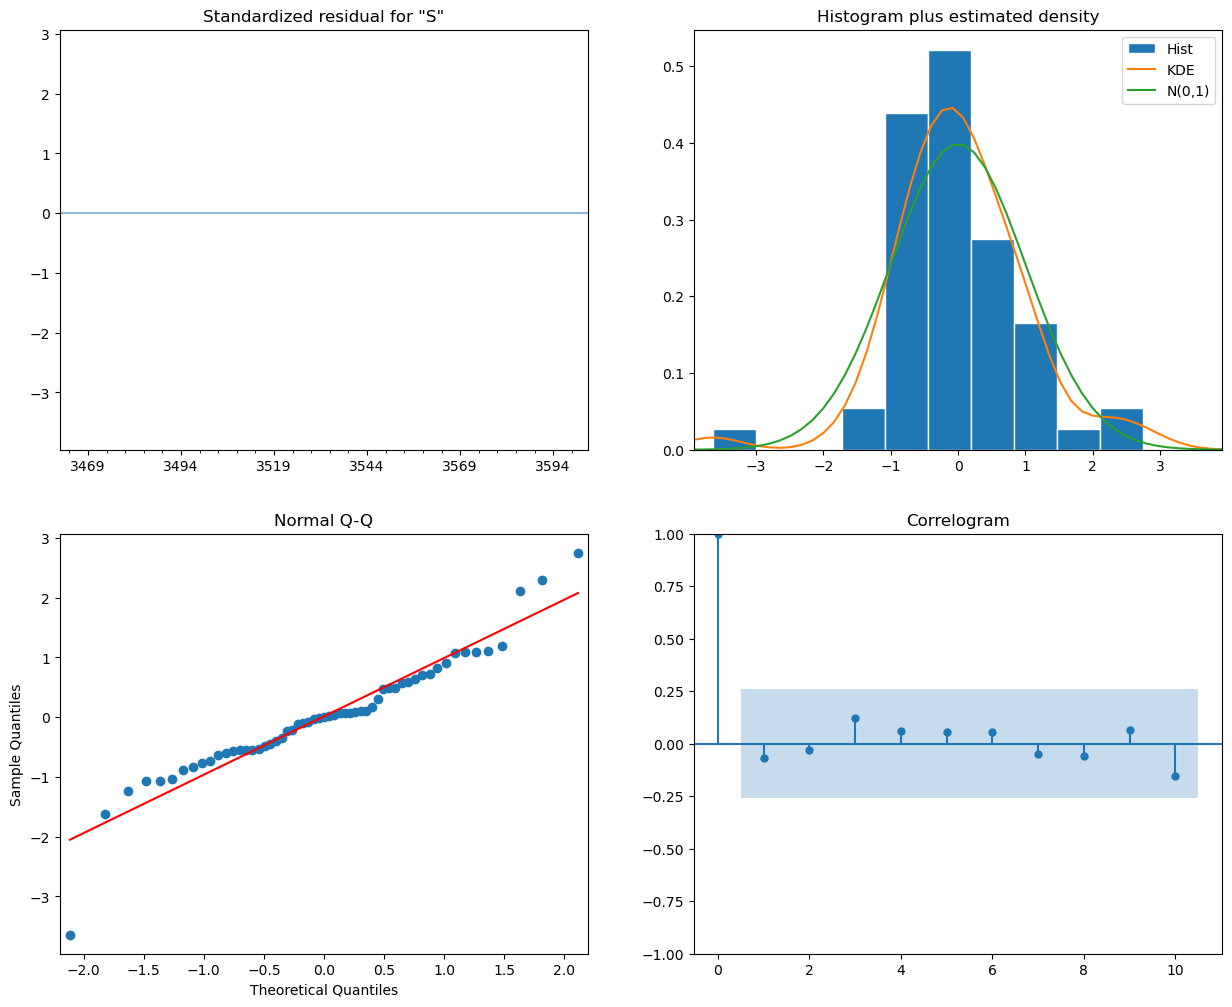

In [24]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [25]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [26]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [27]:
pred=model_arima.predict(start=len(train), end=(len(sales_c)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_c['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [28]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

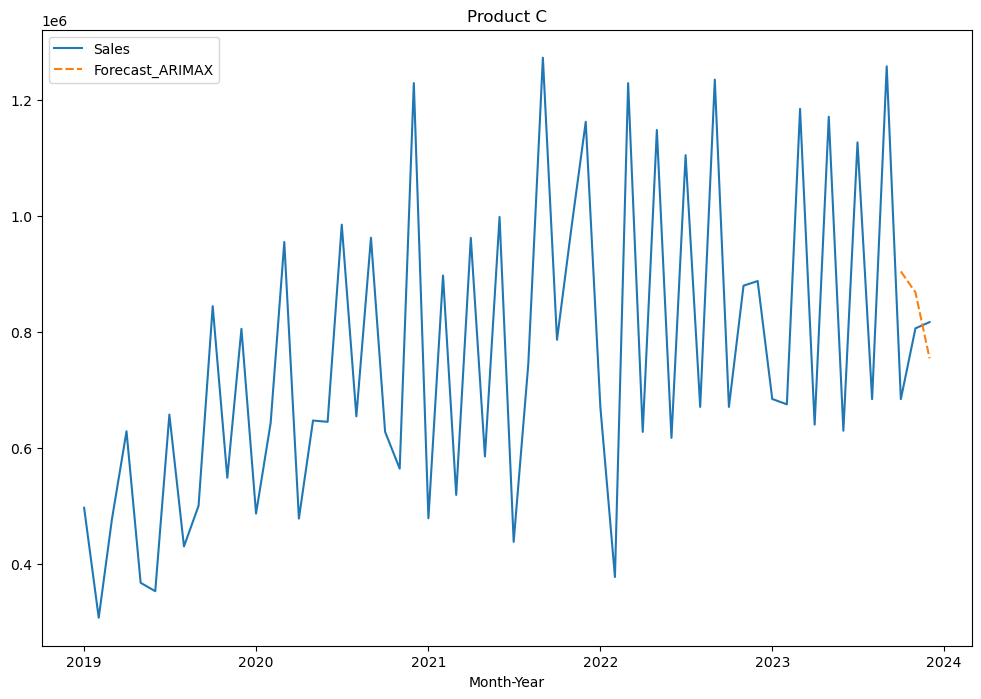

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMAX']])
plt.title('Product C')
plt.show()

In [30]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 115109.42653613056
MAPE - ARIMAX: 0.15874271895448144
MSE - ARIMAX: 18812823345.213257
RMSE - ARIMAX: 137159.84596525785


# SARIMA

In [31]:
import statsmodels.api as sm

In [32]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_c['Sales'], label='Original Series')
#axes[0].plot(sales_c['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_c['Sales'], label='Original Series')
#axes[1].plot(sales_c['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product C', fontsize=16)
#plt.show()

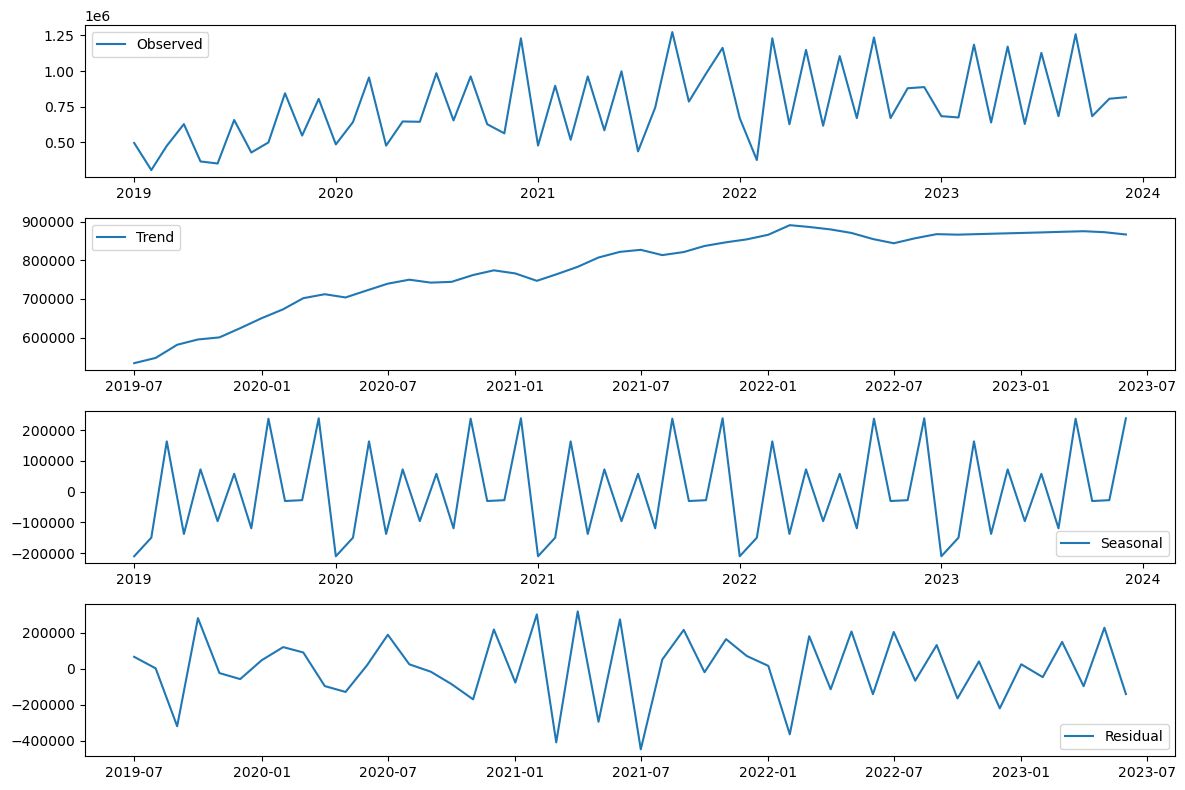

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

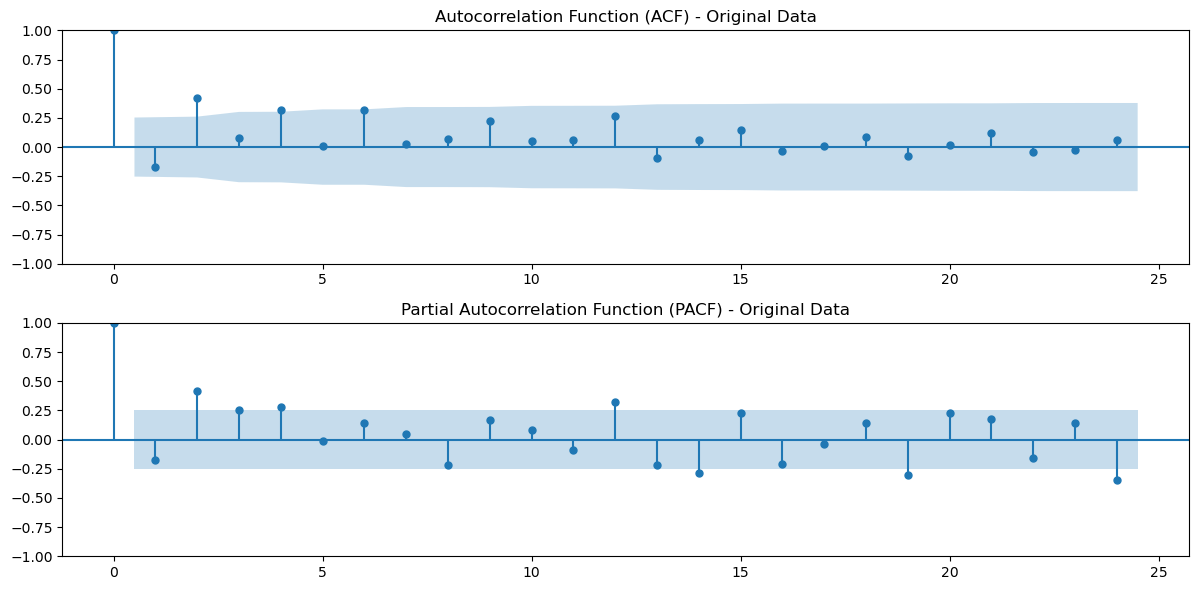

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [36]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 0, 1), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [37]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic            mae           mse
3   1  0  1510.835692  1521.050948   65565.031695  6.230445e+09
1   0  1  1510.879940  1521.095196   71352.945734  9.555099e+09
9   3  0  1510.924172  1525.225531  203423.509121  4.726012e+10
6   2  0  1511.216270  1523.474577  106623.124631  1.262412e+10
2   0  2  1511.433879  1523.692187   98246.164359  1.051459e+10
7   2  1  1511.909756  1526.211115  146602.250725  2.253607e+10
4   1  1  1512.092376  1524.350683   67479.824757  7.545515e+09
12  4  0  1512.923528  1529.267938  204201.739363  4.752586e+10
10  3  1  1512.923887  1529.268297  205061.405542  4.791252e+10
5   1  2  1513.231148  1527.532507  117841.097596  1.434833e+10
8   2  2  1513.593279  1529.937689  174438.657199  3.581918e+10
13  4  1  1514.923565  1533.311026  204128.659613  4.750207e+10
11  3  2  1514.936844  1533.324305  208745.181900  4.936683e+10
14  4  2  1516.923535  1537.354047  204093.596270  4.748880e+10
0   0  0  1519.435669  1527.607874  1306

In [38]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 0, 1),seasonal_order=(1,0,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   57
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood                -750.418
Date:                             Thu, 09 May 2024   AIC                           1510.836
Time:                                     16:22:15   BIC                           1521.051
Sample:                                 01-01-2019   HQIC                          1514.806
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.6357      0.020     31.408      0.000       0.596       0.675
Market

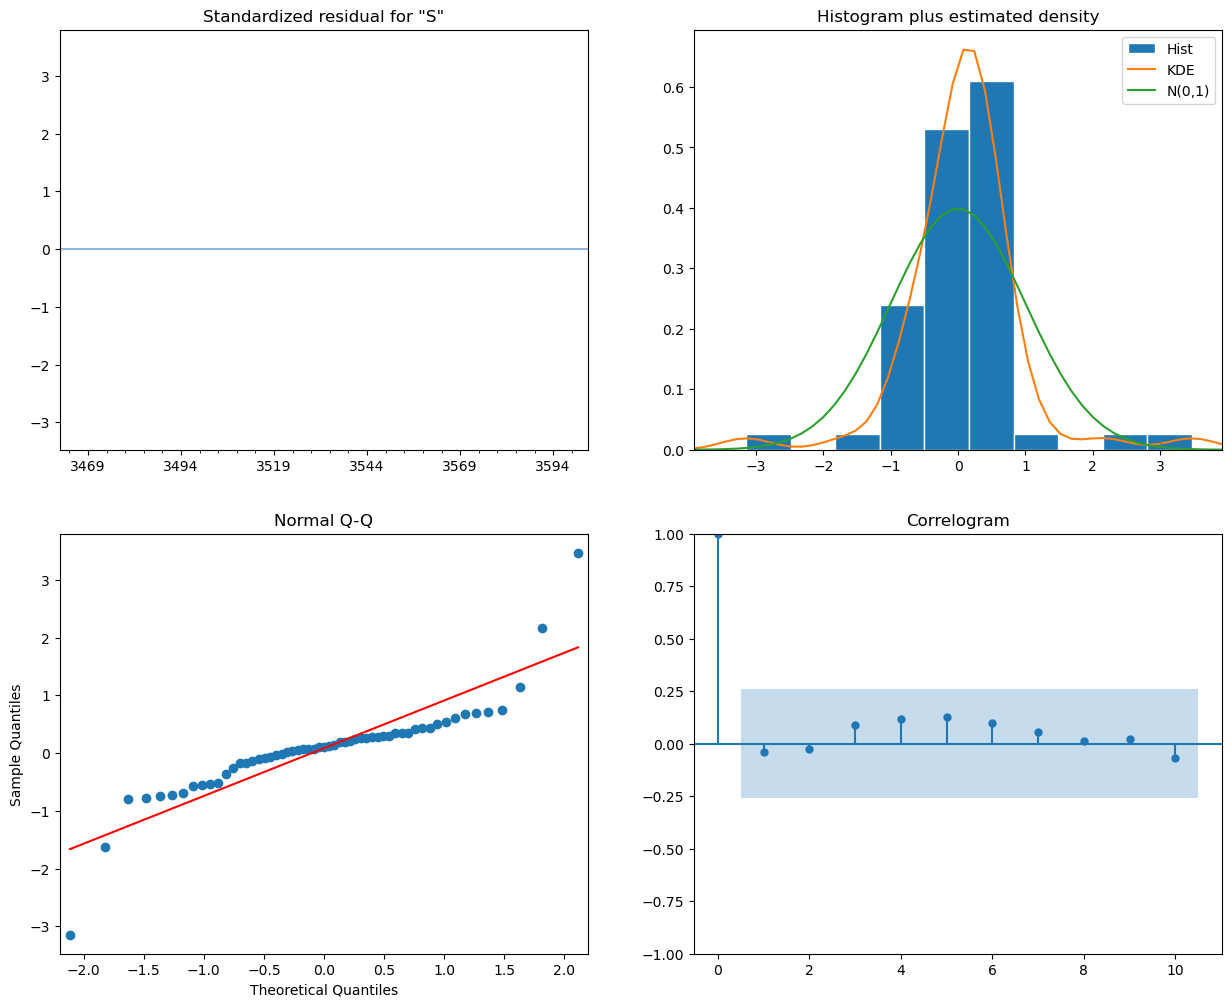

In [39]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [40]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [41]:
sales_c['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

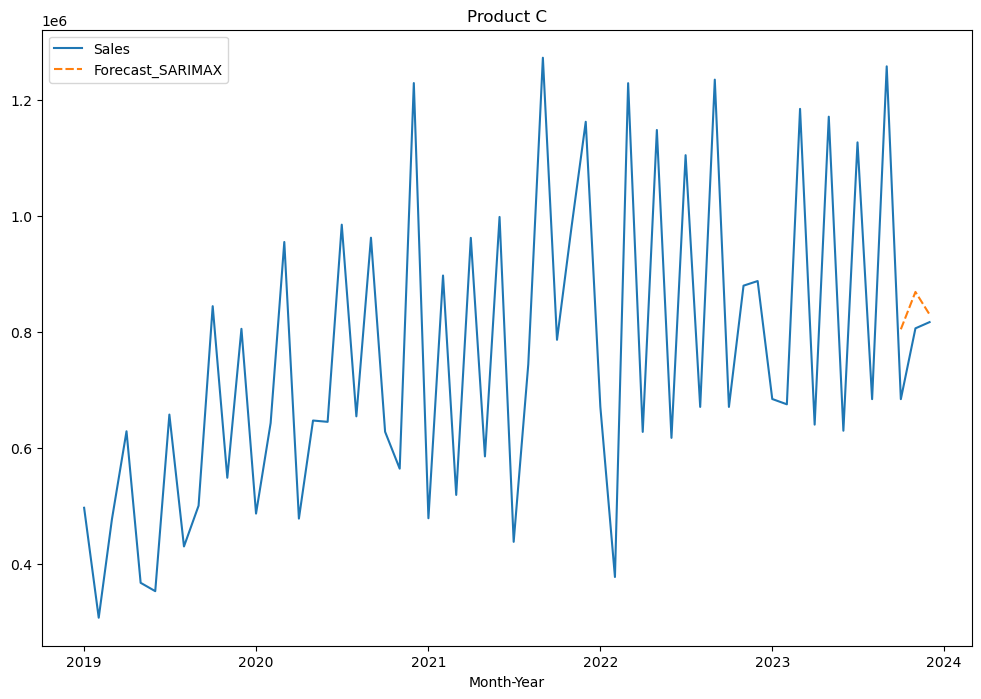

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMAX']])
plt.title('Product C')

In [43]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 65565.032
MAPE - SARIMAX: 0.09
MSE - SARIMAX: 6230444582.028
RMSE - SARIMAX: 78933.165


# AUTO-ARIMA

In [44]:
import pmdarima as pm

In [45]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1591.453, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1589.188, Time=0.05 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1590.668, Time=0.10 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1592.001, Time=0.56 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1593.038, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1591.175, Time=0.13 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1592.638, Time=0.19 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1593.932, Time=0.86 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1593.552, Time=0.15 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1592.584, Time=0.26 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1594.639, Time=0.25 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1595.867, Time=2.56 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1594.476, Time=0.71 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1594.252, Time=1.23 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=1596.271, Time=1.21

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [44]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   57
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -621.503
Date:                              Thu, 02 May 2024   AIC                           1253.005
Time:                                      19:38:33   BIC                           1262.039
Sample:                                  01-01-2019   HQIC                          1256.373
                                       - 09-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.031e+05   5.24e+04      1.970      0.049     518.756    2.06e+05
ar.L1         -0.1517      0.205     -0.739      0.460      -0.554       0.251
ar.L2          0.4278      0.180      2.370      0.018       0.074       0.782
ma.S.L12      -0.5717      0.358     -1.597      0.110      -1.273       0.130
sigma2      6.652e+10      0.072   9.25e+11      0.000    6.65e+10    6.65e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.35
Prob(Q):                              0.74   Prob(JB):                         0.19
Heteroskedasticity (H):               0.27   Skew:                             0.56
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.42e+28. Standard errors may be unstable.
"""

In [ ]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [45]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_c['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

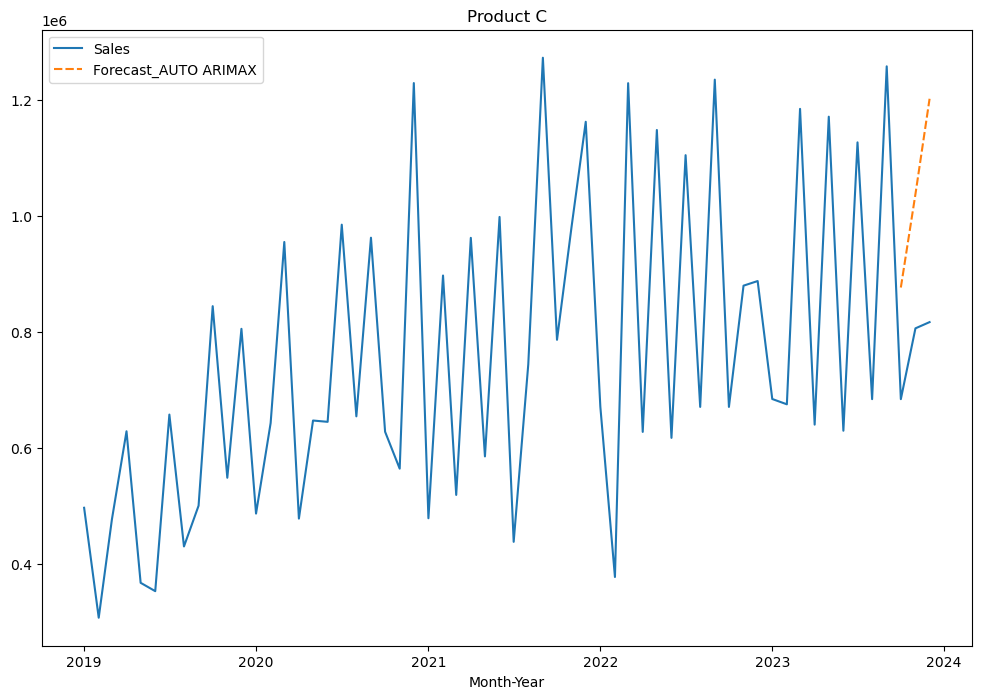

In [46]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product C')

In [47]:
mae_auto_arimax= round(mean_absolute_error(test['Sales'],forecast_test_auto),3)
mape_auto_arimax= round(mean_absolute_percentage_error(test['Sales'],forecast_test_auto),3)
mse_auto_arimax=round(mean_squared_error(test['Sales'],forecast_test_auto),3)
rmse_auto_arimax= round(np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto)),3)

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 270111.647
MAPE - AUTO ARIMAX: 0.347
MSE - AUTO ARIMAX: 79897714842.984
RMSE - AUTO ARIMAX: 282661.838


In [48]:
sales_c.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,684175,1198238,333991,NaN,NaN,NaN
2023-02-01,675038,1182240,329531,NaN,NaN,NaN
2023-03-01,1185258,2075812,578603,NaN,NaN,NaN
2023-04-01,639923,1120744,312389,NaN,NaN,NaN
2023-05-01,1171761,2052183,572015,NaN,NaN,NaN
2023-06-01,629400,1102308,307252,NaN,NaN,NaN
2023-07-01,1127413,1974516,550365,NaN,NaN,NaN
2023-08-01,683935,1197820,333874,NaN,NaN,NaN
2023-09-01,1258717,2204473,614464,NaN,NaN,NaN


In [49]:
sales_c.mean()

Sales                   7.599849e+05
Market Size             1.263304e+06
Marketing Expense       5.537495e+05
Forecast_ARIMAX         8.424531e+05
Forecast_SARIMAX        8.559856e+05
Forecast_AUTO ARIMAX    1.039155e+06
dtype: float64

In [51]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,115109.426536,0.158743,1.881282e+10,137159.845965
AUTO ARIMAX,270111.647000,0.347000,7.989771e+10,282661.838000
SEASONAL ARIMAX,141359.380478,0.184080,2.270730e+10,150689.417565


Text(0.5, 1.0, 'Product C')

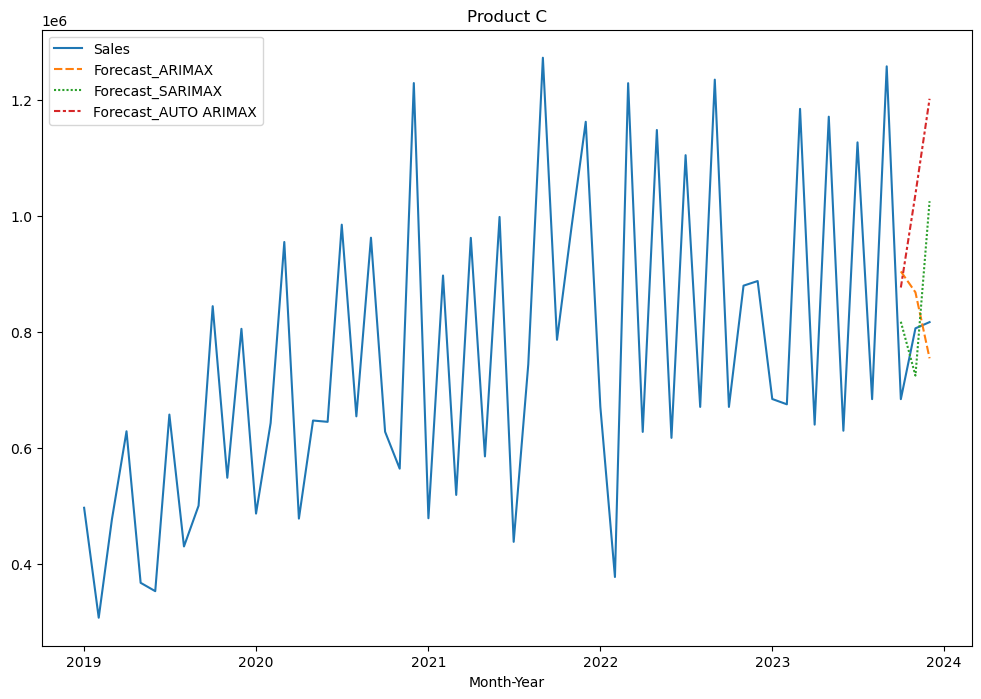

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMAX','Forecast_SARIMAX','Forecast_AUTO ARIMAX']])
plt.title('Product C')

# TESTING

In [20]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, d=None, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1610.067, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1610.011, Time=0.07 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1612.005, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1610.048, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1611.772, Time=0.21 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1613.725, Time=0.61 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1612.042, Time=0.12 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1613.699, Time=0.47 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1571.642, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1569.970, Time=0.09 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1571.531, Time=0.32 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1572.979, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [21]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -767.092
Date:                            Wed, 08 May 2024   AIC                           1544.183
Time:                                    18:49:59   BIC                           1554.310
Sample:                                01-01-2019   HQIC                          1548.109
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.049e+04   1.24e+04      2.461      0.014    6203.738    5.48e+04
ar.L1         -0.6203      0.151     -4.102      0.000      -0.917      -0.324
ma.L1         -0.7229      0.120     -6.005      0.000      -0.959      -0.487
ma.S.L12       0.2271      0.195      1.164      0.244      -0.155       0.610
sigma2      5.044e+10      0.009   5.74e+12      0.000    5.04e+10    5.04e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.26
Prob(Q):                              0.91   Prob(JB):                         0.07
Heteroskedasticity (H):               0.80   Skew:                            -0.48
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.78e+27. Standard errors may be unstable.
"""

In [22]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_c['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product C')

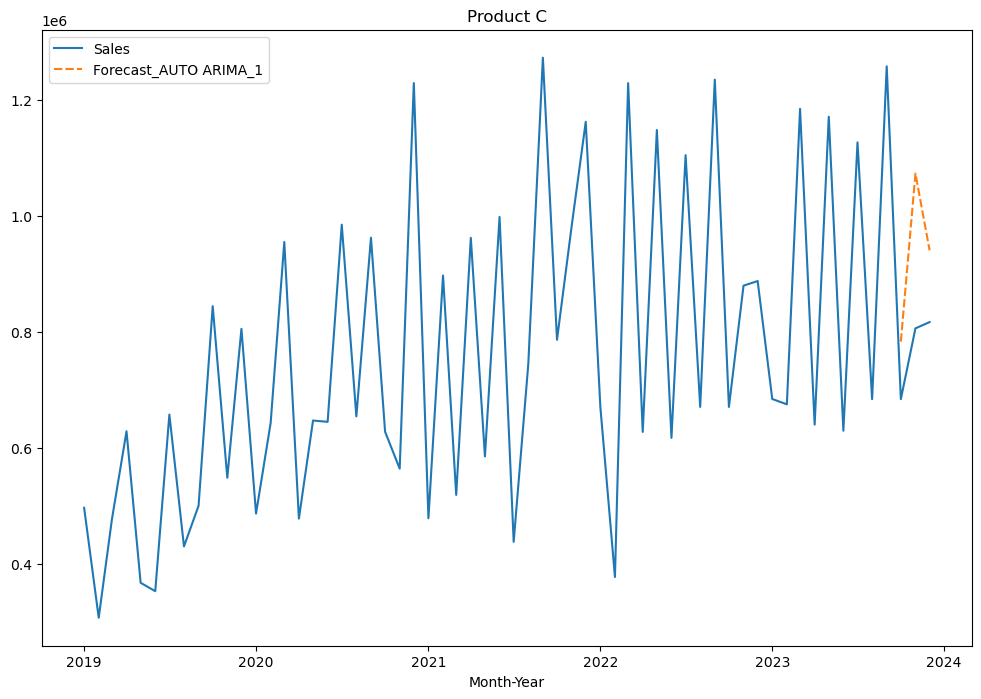

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product C')

In [24]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 163634.39910508957
MAPE - AUTO ARIMA: 0.20963615720392428
MSE - AUTO ARIMA: 32265144013.510834
RMSE - AUTO ARIMA: 179625.00943218023
